In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba 

import scipy.stats as st
from scipy.sparse import csr_matrix

import os
from glob import glob

import colorcet as cc
import cmocean.cm as cmo

import holoviews as hv
hv.extension("matplotlib")

import matplotlib.pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# %load_ext blackcellmagic

<hr>

In [91]:
data_dir = os.path.abspath("../data")
save_dir = os.path.abspath("../plots")
# data_fname = "C:/Users/Pranav/git/evomorph/lateral_signaling/sim_data/20210812_sweep_singlespotphase_dense/20210812_sweep_singlespotphase_dense_results.npz"

save_figs = False
fig_fmt   = "png"
dpi       = 180

In [62]:
data_fname = "sim_data/20210812_sweep_singlespotphase_dense/20210812_sweep_singlespotphase_dense_results.npz"
data_path = os.path.join(data_dir, data_fname) 

In [64]:
mle_params_fname = "growth_parameters_MLE.csv"
mle_params_path = os.path.join(data_dir, mle_params_fname)

In [65]:
assert os.path.exists(mle_params_path), "File does not exist"

mle_params_df = pd.read_csv(mle_params_path, index_col=0)
mle_params_df

condition  g_inv_days  g_inv_days_90CI_lo  g_inv_days_90CI_hi  \
0       FGF2    1.088313            0.847411            1.449318   
1         RI    0.141042            0.111284            0.169047   
2  untreated    0.728398            0.604513            0.883794   

   rho_max_inv_mm2  rho_max_inv_mm2_90CI_lo  rho_max_inv_mm2_90CI_hi  \
0      7038.003027              6392.692794              7938.776514   
1      7038.003027              6392.692794              7938.776514   
2      7038.003027              6392.692794              7938.776514   

         sigma   g_ratio  rho_max_ratio  doubling_time_days  \
0  1435.041229  1.494119       5.630402            0.636900   
1   504.595599  0.193633       5.630402            4.914488   
2   787.495152  1.000000       5.630402            0.951605   

   doubling_time_hours  
0            15.285609  
1           117.947718  
2            22.838514

In [66]:
assert os.path.exists(data_path), f"Data file does not exist: {data_path}"

# Load data
data = np.load(data_path)
print("Loaded data")

Loaded data


In [19]:
# Unpack results 
n                = data["n"]
t                = data["t"]
trial_name       = data["trial_name"]
param_names      = data["param_names"]
param_vals       = data["param_vals"]
beta_args        = data["beta_args"]
delay            = data["delay"]
irad             = data["irad"]
random_seeds     = data["random_seeds"]
sender_idx       = data["sender_idx"]
# sender_idx_rep   = data["sender_idx_rep"]
free_param_names = data["free_param_names"]
param_space      = data["param_space"]
S_actnum_param   = data["S_actnum_param"]
S_tcmean_param   = data["S_tcmean_param"]
S_xaxis_param    = data["S_xaxis_param"]
S_A_param        = data["S_A_param"]
rho_max          = data["rho_max"]
R_actnum_param   = data["R_actnum_param"]
R_tcmean_param   = data["R_tcmean_param"]
R_xaxis_param    = data["R_xaxis_param"]
R_A_param        = data["R_A_param"]


In [20]:
step_delay = int(delay / (t[1] - t[0]))

In [21]:
n_runs = param_space.shape[0]

n_reps = np.unique(param_space[:, 0]).size
n_params = param_space.shape[1] - 1

n_sets = n_runs // n_reps

n_senders = sender_idx.size
# n_senders = sender_idx_rep.shape[1]

In [22]:
g_space     = np.sort(np.unique(param_space[:, 1]))
rho_0_space = np.sort(np.unique(param_space[:, 2]))

g_range     = g_space[-1] - g_space[0]
rho_0_range = rho_0_space[-1] - rho_0_space[0]

In [23]:
param_space_agg = param_space[param_space[:, 0] == 0., 1:]

In [24]:
param_rep_idx   = np.zeros((n_sets, n_reps),   dtype=int)

for i, row in enumerate(param_space_agg):
    param_rep_idx[i] = (param_space[:, 1:] == param_space_agg[i]).all(axis=1).nonzero()[0]

In [25]:
print("Data contains variables:", *list(data.keys()), sep="\n\t")
print()
print(
    "Number of runs:",
    "{0} ({1} sets of {2} replicates)".format(n_runs, n_sets, n_reps),
    sep="\n\t",
)
print()
print("Parameters scanned:")
print(*["\t" + pn for pn in free_param_names])

Data contains variables:
	n
	t
	trial_name
	param_names
	param_vals
	beta_args
	delay
	irad
	r_int
	rho_max
	random_seeds
	sender_idx
	x_axis_cells
	S0_rep
	free_param_names
	param_space
	thresh
	gamma_R
	S_xaxis_param
	S_actnum_param
	S_tcmean_param
	S_A_param
	R_xaxis_param
	R_actnum_param
	R_tcmean_param
	R_A_param

Number of runs:
	2880 (576 sets of 5 replicates)

Parameters scanned:
	rep 	g 	rho_0


In [26]:
# Number of activated cells (mean of n = n_reps)
S_actnum_mean = S_actnum_param[param_rep_idx, :].mean(axis=1)

# Mean fluorescence (mean of n = n_reps)
S_tcmean_mean = S_tcmean_param[param_rep_idx, :].mean(axis=1)

# Mean signal fluorescence of TCs along x-axis 
S_xaxis_mean = S_xaxis_param[param_rep_idx, :].mean(axis=1)

# % of cells activated over time
S_prop_param = S_actnum_param / (n - n_senders)
S_prop_mean  = S_actnum_mean  / (n - n_senders)

# Area of activated cells over time
S_A_mean = S_A_param[param_rep_idx].mean(axis=1)
S_A_max  = S_A_mean.max(axis=1)

# % of cells stimulated (activated at any point in time)
S_stimulated_num = S_actnum_mean.max(axis=1)
S_stimulated_pct = S_stimulated_num / S_stimulated_num.max()


In [27]:
# Number of activated cells (mean of n = n_reps)
R_actnum_mean = R_actnum_param[param_rep_idx, :].mean(axis=1)

# Mean fluorescence (mean of n = n_reps)
R_tcmean_mean = R_tcmean_param[param_rep_idx, :].mean(axis=1)

# Mean reporter fluorescence of TCs along x-axis 

R_xaxis_mean = S_xaxis_param[param_rep_idx, :].mean(axis=1)

# % of cells activated
R_prop_param = R_actnum_param / (n - n_senders)
R_prop_mean  = R_actnum_mean  / (n - n_senders)

# Area of activated cells over time
R_A_mean = R_A_param[param_rep_idx].mean(axis=1)
R_A_max  = R_A_mean.max(axis=1)

# % of cells stimulated (activated at any point in time)
R_stimulated_num = R_actnum_mean.max(axis=1)
R_stimulated_pct = R_stimulated_num / R_stimulated_num.max()

<hr>

# Calculation of spot activation phase

In order to quantify the behavior of a Transceiver sheet, we consider two independent Transceiver behaviors, expressed as Boolean quantities $\phi_\text{init}$ and $\phi_\text{end}$. 
1. Initial strength of Transceiver activation ($\phi_\text{initial}$). In other words, does the tissue display an initial response to the Sender? 
2. Final outcome of Transceiver activation ($\phi_\text{final}$). Are there any signal-producing Transceivers at the end of simulation time?

To assign a metric for initial activation, we consider only the Transceivers directly adjacent to the Sender (denoted $\text{TC1}$) and calculate the initial signal production velocity $v_\text{initial}$ at the first moment of activation, when $t=\tau$. $\phi_\text{initial}$ can then be calculated by comparison to a threshold $v_\text{thresh}$. 

\begin{align}
\phi_\text{initial} &= v_\text{initial} > v_\text{thresh} \\[1em]
v_\text{initial} &= \frac{\mathrm{d} S_\text{TC 1}}{\mathrm{d} t} (t=\tau)
\end{align}

For the final outcome of activation, we calculate the number of activated Transceivers at the end of simulation time.

$$\phi_\text{final} = n_\text{act}\,(t_\text{final}) > 0$$

In [35]:
# Initial activation velocity of first Transceiver (TC1)
S_t_tc1 = S_xaxis_mean[:, :, 0]
v_init = (
    S_t_tc1[:, (step_delay + 1)] - S_t_tc1[:, step_delay]
) / (
    t[step_delay + 1] - t[step_delay]
)

In the absence of an *a priori* value for $v_\text{thresh}$, let us examine the distribution of $v_\text{init}$ in our simulation runs.

:Scatter   [x]   (y)
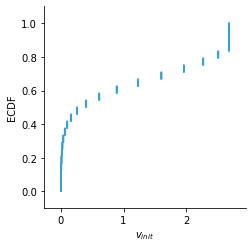

In [36]:
v_init_ecdf = lsig.ecdf(v_init).opts(s=3, ylabel="ECDF", xlabel = r"$v_{init}$")
v_init_ecdf

The strong sigmoid shape of $v_\text{init}$ suggests that parameter sets can be easily categorized into "initially activating" ($\text{~35%}$) and "initially non-activating" ($~\text{65%}$). We will use the cutoff $v_\text{thresh} = 0.5$, although different cutoffs produce only slight shifts in the resulting phase boundary.

Using this threshold and the above equations, we then calculate both Boolean behavior metrics.

In [42]:
# Threshold for initial velocity
v_thresh = 0.5

# Initial velocity metric
phi_init = v_init > v_thresh

# Activation at final time-point metric
phi_fin  = S_actnum_mean[:, -1] > 0

We then categorize behavior into phases using a truth table. 

| Initial response? | Lingering activation? | Phase | 
| ----------------- | --------------------- | ----- |
| N | N | (0) No propagation |
| N | Y | (0) No propagation |
| Y | N | (1) Transient propagation |
| Y | Y | (2) Persistent propagation |

In [47]:
# Overall behavior phase as integer (0 to 3)
phase = phi_init.astype(int) * (1 + phi_fin.astype(int))

# Phase as color hex-code
phase_colors = np.array([lsig.cols_blue[2], lsig.cols_blue[1], lsig.cols_blue[0]])[phase]

<hr>

In [48]:
buffer = 0.05

xlim = tuple([
    lsig.g_to_units(g_space[0]  - buffer * g_range),
    lsig.g_to_units(g_space[-1] + buffer * g_range),
])

ylim = tuple([
    rho_0_space[0]  - buffer * rho_0_range,
    rho_0_space[-1] + buffer * rho_0_range,
])

In [49]:
mask = param_space_agg[:, 1] <= rho_max

In [50]:
phasediagram = hv.Points(
    (
        lsig.g_to_units(param_space_agg[mask, 0]), 
        param_space_agg[mask, 1],
    ),
).opts(
#     title = r"$\rho$ₘₐₓ = " + "{0:.2f}".format(rho_max),
    xlim = xlim,
    ylim = ylim,
    xlabel = r"proliferation rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5, 6),
    marker = "s",
    edgecolor = "w",
    s=60,
    c=phase_colors[mask], 
#     logx=True, 
    fontscale=1.,
#     xaxis="top",
    hooks=[lsig.remove_RT_spines],
)

## Make a bare version of phase diagram

In [88]:
phasediagram_bare = phasediagram.options(dict(
    Points=dict(edgecolor=None, s=65)
))

phasediagram_bare_nolabels = phasediagram_bare.options(
    xaxis=None,
    yaxis=None,
)

:Points   [x,y]
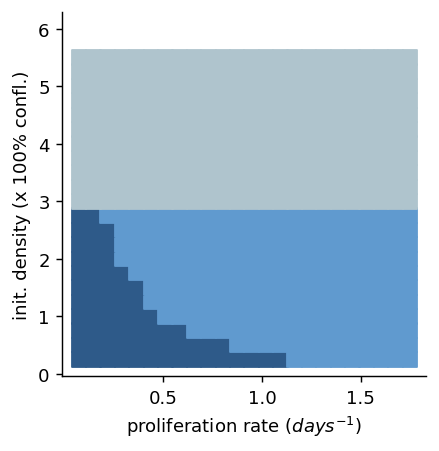

In [89]:
hv.output(phasediagram_bare, dpi=130)

## Save

In [94]:
if save_figs:
    fname = "phasediagram_bare"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(phasediagram_bare, fpath, dpi=dpi)

In [95]:
if save_figs:
    fname = "phasediagram_bare_nolabels"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(phasediagram_bare_nolabels, fpath, dpi=dpi)

:Points   [x,y]
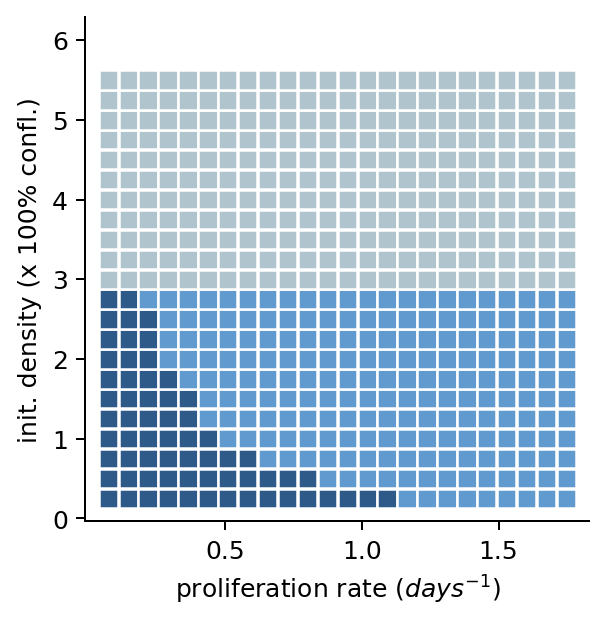

In [51]:
hv.output(phasediagram, dpi=180)

## Save

In [52]:
if save_figs:
    fname = "phasediagram_empty"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(phasediagram, fpath, dpi=250)

<hr>

## Add points to indicate selected examples

In [53]:
ONOFF_example = np.logical_and(
    param_space_agg[:, 0] == g_space[11], 
    param_space_agg[:, 1] == rho_0_space[3],
).nonzero()[0][0]

ON_example = np.logical_and(
    param_space_agg[:, 0] == g_space[3], 
    param_space_agg[:, 1] == rho_0_space[3],
).nonzero()[0][0]

OFF_example = np.logical_and(
    param_space_agg[:, 0] == g_space[11], 
    param_space_agg[:, 1] == rho_0_space[16],
).nonzero()[0][0]

# slowON_example = np.logical_and(
#     param_space_agg[:, 0] == g_space[1], 
#     param_space_agg[:, 1] == rho_0_space[11],
# ).nonzero()[0][0]

examples_idx = np.array([OFF_example, ONOFF_example, ON_example])

In [59]:
examples = hv.Points(
    (
        lsig.g_to_units(param_space_agg[examples_idx, 0]), 
        param_space_agg[examples_idx, 1],
    )
).opts(
    marker="s",
    c=phase_colors[examples_idx],
    s=60,
    edgecolor="k",
    linewidth=2,
)

plot_ex = phasediagram_bare * examples

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
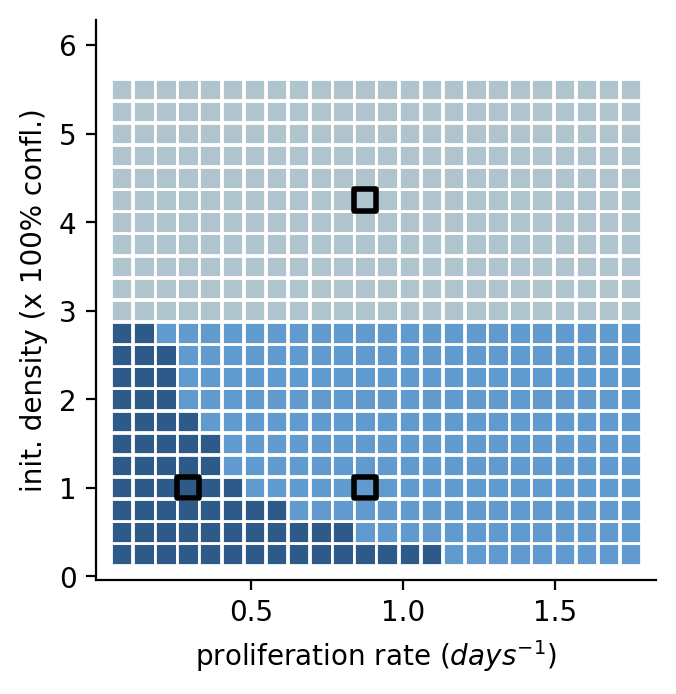

In [60]:
hv.output(plot_ex, dpi=200)

## Save

In [61]:
if save_figs:
    fname = "phasediagram_examples"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(plot_ex, fpath, dpi=250)

# Add MLE parameters to phase diagram

In [131]:
assert os.path.exists(mle_params_file), "File does not exist"

mle_params_df = pd.read_csv(mle_params_file, index_col=0)
mle_params_df

condition  g_inv_days  g_inv_days_90CI_lo  g_inv_days_90CI_hi  \
0       FGF2    1.088313            0.847411            1.449318   
1         RI    0.141042            0.111284            0.169047   
2  untreated    0.728398            0.604513            0.883794   

   rho_max_inv_mm2  rho_max_inv_mm2_90CI_lo  rho_max_inv_mm2_90CI_hi  \
0      7038.003027              6392.692794              7938.776514   
1      7038.003027              6392.692794              7938.776514   
2      7038.003027              6392.692794              7938.776514   

         sigma   g_ratio  rho_max_ratio  doubling_time_days  \
0  1435.041229  1.494119       5.630402            0.636900   
1   504.595599  0.193633       5.630402            4.914488   
2   787.495152  1.000000       5.630402            0.951605   

   doubling_time_hours  
0            15.285609  
1           117.947718  
2            22.838514

In [67]:
params_point = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
    ]
).opts(
    marker="^",
    c=lsig.cols_red[1],
    s=180,
    ec=lsig.col_black,
)

params_CI = hv.ErrorBars(
    (
        mle_params_df.g_inv_days.values[2], 
        1., 
        mle_params_df.g_inv_days.values[2] - mle_params_df.g_inv_days_90CI_lo[2],
        mle_params_df.g_inv_days_90CI_hi[2] - mle_params_df.g_inv_days.values[2],
    ),
    horizontal=True,
).opts(
    edgecolor=lsig.col_black,
    linewidth=2,
    capsize=2.5,
)

plot_ex_point = phasediagram * examples * params_CI * params_point

:Overlay
   .Points.I    :Points   [x,y]
   .Points.II   :Points   [x,y]
   .ErrorBars.I :ErrorBars   [x]   (y,yerror)
   .Points.III  :Points   [x,y]
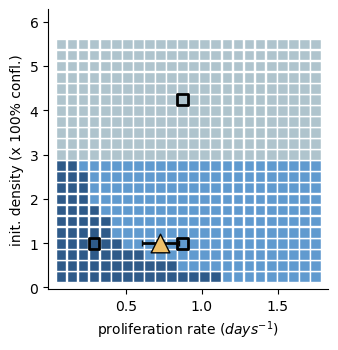

In [68]:
hv.output(plot_ex_point, dpi=100)

## Save

In [134]:
fname = "phasediagram_examples_and_tc"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(plot_ex_point, fpath, dpi=250)

<hr>

## Plot time-series of examples

In [69]:
# Sub-sample time-points
sample_skip = 25
t_sample = lsig.t_to_units(t[::sample_skip].copy())
actnum_example_sample = S_actnum_mean[examples_idx, ::sample_skip]
actrad_example_sample = np.sqrt((actnum_example_sample + 1) / np.pi)
actarea_example_sample = S_A_mean[examples_idx, ::sample_skip]


In [70]:
# Make data
example_data_list = [
    dict(
        t=t_sample,
        example=[i] * t_sample.size,
        actnum=actnum_example_sample[i],
        actrad=actrad_example_sample[i],
        actarea=actarea_example_sample[i],
    )
    for i, _ in enumerate(examples_idx)
]

In [34]:
# Plot
example_plots = [
    hv.Curve(
        example_data_list[i],
        kdims=["t"],
        vdims=["actarea"],
    ).opts(
        xlabel=("", "", "time")[i],
        xticks=0,
#         ylabel=("", "radius (cell diameters)", "")[i],
#         yticks=[0, 25],
#         ylim=(-1, 28),
        linewidth=10,
        fontscale=3,
        color=phase_colors[examples_idx][i],
    )
    for i, _ in enumerate(examples_idx)
]

In [71]:
examples_overlay = hv.Layout(example_plots).opts(vspace=0.4, sublabel_size=0).cols(1)
examples_overlay

NameError: name 'example_plots' is not defined

In [62]:
nt_t = np.searchsorted(lsig.t_to_units(t), [1.])[0]

In [67]:
examples_max_idx = S_actnum_mean[examples_idx].argmax(axis=1)
examples_max_idx[0] = int(nt_t * 1.5)

examples_max_idx

array([109, 207, 523], dtype=int64)

In [68]:
lsig.t_to_units(t)[examples_max_idx], S_actnum_mean[examples_max_idx]

(array([1.49828179, 2.84536082, 7.18900344]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [36]:
example_max_points = hv.Scatter(
    (lsig.t_to_units(t)[examples_max_idx], S_actnum_mean[examples_max_idx]),
).opts(
)

example_plots_horizontal = [
    hv.Curve(
        example_data_list[i],
        kdims=["t"],
        vdims=["actrad"],
    ).opts(
        xlabel=("", "days", "")[i],
        xlim=(0, 8),
        xticks=(0, 8),
        ylabel=("radius (cell diam.)", "", "")[i],
        yticks=[0, 25],
        ylim=(-1, 28),
        linewidth=10,
        fontscale=3,
        color=phase_colors[examples_idx][i],
    )
    for i, _ in enumerate(examples_idx)
]

examples_overlay_horizontal = hv.Layout(example_plots_horizontal).opts(hspace=0.25, sublabel_size=0).cols(3)

:Layout
   .Curve.I   :Curve   [t]   (actrad)
   .Curve.II  :Curve   [t]   (actrad)
   .Curve.III :Curve   [t]   (actrad)
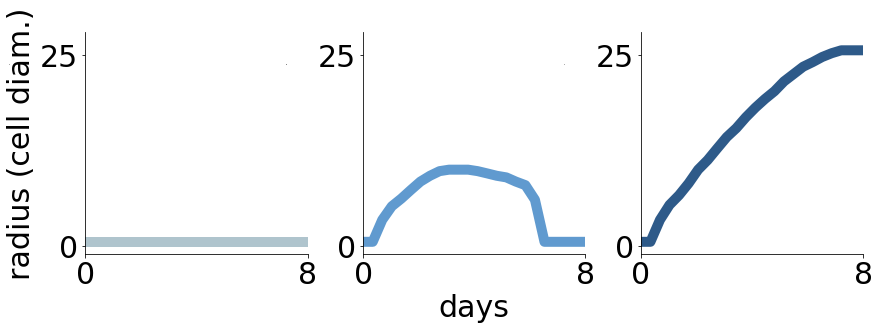

In [37]:
examples_overlay_horizontal

## Save

In [38]:
fname = "phasediagram_examples_radius_timeseries_horizontal"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(examples_overlay_horizontal, fpath, dpi=250)

<hr>

# Plot stimulated area

In [72]:
area_ceiling = 1e5
S_A_max_trunc = np.minimum(S_A_max, area_ceiling)

In [73]:
stim_mask = np.logical_and(S_A_max > 0.1 * area_ceiling, S_A_max < area_ceiling)

# stimulated_points_outline3 = hv.Scatter(
#     (
#         lsig.g_to_units(param_space_agg[stim_mask, 0]), 
#         param_space_agg[stim_mask, 1],
#     ),
# ).opts(
#     marker = "s",
#     edgecolor = "k",
#     linewidth=2,
#     s=70,
# )

# stimulated_plot = hv.Scatter(
#     (
#         lsig.g_to_units(param_space_agg[stim_mask, 0]), 
#         param_space_agg[stim_mask, 1],
#     ),
# ).opts(
#     xlim = xlim,
#     ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
#     aspect = 25/18,
#     xlabel = r"proliferation rate ($days^{-1}$)",
#     xticks = (0.5, 1.0, 1.5),
#     ylabel = r"init. density (x 100% confl.)",
#     yticks = (0, 1, 2, 3, 4, 5),
#     marker = "s",
# #     edgecolor = "w",
#     s=65,
# #     c="w",
#     c="#e5e5e5",
# #     c=stimulated_pct[mask],
# #     cmap=cmo.algae,
#     colorbar=True,
# #     logx=True, 
#     fontscale=1.,
# )

stimulated_points_bg = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[mask, 0]), 
        param_space_agg[mask, 1],
    ),
).opts(
    marker = "s",
    edgecolor = (0,0,0,0),
    c=lsig.hexa2hex(phase_colors[mask], alpha=0.8),
    linewidth=0,
    s=65,
)

stimulated_var_points = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[mask, 0]), 
        param_space_agg[mask, 1],
    ),
).opts(
    marker=".",
#     s=130 * (R_actnum_mean.max(axis=1) > 0)[mask],
    s=130 * S_A_max_trunc[mask] / area_ceiling,
#     c="k",
    c="w",
#     c=phase_colors[mask], 
)

# stimulated_sat_points = hv.Scatter(
#     (
#         lsig.g_to_units(param_space_agg[phase==0, 0]), 
#         param_space_agg[phase==0, 1],
#     ),
# ).opts(
#     marker="s",
#     s=70,
#     c="k",
# )

points_scale_bg_xvals = np.array([
    [*(1.9 * np.ones(21)), *(1.95 * np.ones(21))],
    [*np.linspace(0.25, 5.0, 21), *np.linspace(0.25, 5.0, 21)]
])

var_points_scale_bg = hv.Scatter(
    points_scale_bg_xvals.T
).opts(
    marker = "s",
    edgecolor = (0,0,0,0),
    c=lsig.col_gray,
    linewidth=0,
    s=65,
)


var_points_scale = hv.Scatter(
    (1.925 * np.ones(11), np.linspace(0.375, 4.875, 11))
).opts(
    marker=".",
    s=130 * np.arange(1, -0.01, -0.1),
    c="w",
#     aspect=0.1
)

x_stretch = (2 - xlim[0]) / (xlim[1] - xlim[0])

stimulated_overlay = (
#     stimulated_points_outline * stimulated_plot * stimulated_var_points
    stimulated_points_bg * stimulated_var_points * var_points_scale_bg * var_points_scale
).opts(
#     xlim = (xlim[0], 2),
#     ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
#     aspect = 25/18 * x_stretch,
    xlim = (xlim[0], 2),
    ylim = ylim,
    aspect = x_stretch,
#     xlim = xlim,
#     ylim = ylim,
    xlabel = r"proliferation rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5, 6),
)

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
   .Scatter.IV  :Scatter   [x]   (y)
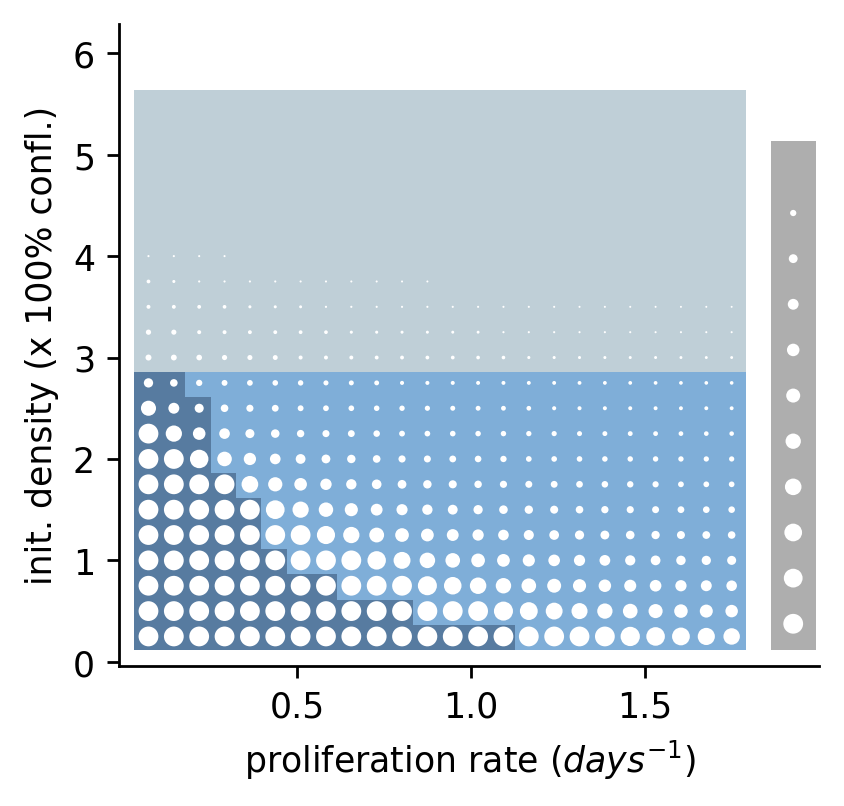

In [74]:
hv.output(stimulated_overlay, dpi=250)

## Save

In [75]:
if save_figs:
    fname = "phasediagram_stimulated_area"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(stimulated_overlay, fpath, dpi=250)

<hr>

In [76]:
np.array([
    [S_A_max_trunc[phase == 0].min(), S_A_max_trunc[phase == 0].max()], # OFF
    [S_A_max_trunc[phase == 1].min(), S_A_max_trunc[phase == 1].max()], # ON-OFF
    [S_A_max_trunc[phase == 2].min(), S_A_max_trunc[phase == 2].max()], # ON
]) / 1e4

array([[ 0.        ,  0.9160533 ],
       [ 0.33631945, 10.        ],
       [ 1.4714912 , 10.        ]], dtype=float32)

In [77]:
x_stretch = (2 - xlim[0]) / (xlim[1] - xlim[0])

stimulated_plot2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    xlim = (xlim[0], 2),
    ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
    aspect = 25/18 * x_stretch,
    xlabel = r"proliferation rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5),
    marker = "s",
#     edgecolor = "w",
    s=70,
    c="w",
#     c=stimulated_pct[mask],
#     cmap=cmo.algae,
#     colorbar=True,
#     logx=True, 
    fontscale=1.,
)

stimulated_points_outline2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    marker = "s",
    edgecolor = "k",
    linewidth=2,
    s=70,
)

stimulated_var_points2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    marker=".",
    s=130 * S_A_max_trunc[phase == 1] / area_ceiling,
    c="k",
)

var_points_scale = hv.Scatter(
    (1.95 * np.ones(11), np.linspace(0.25, 4.25, 11))
).opts(
    marker=".",
    s=130 * np.arange(1, -0.01, -0.1),
    c="k",
#     aspect=0.1
)

stimulated_overlay2 = stimulated_points_outline2 * stimulated_plot2 * stimulated_var_points2 * var_points_scale

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
   .Scatter.IV  :Scatter   [x]   (y)
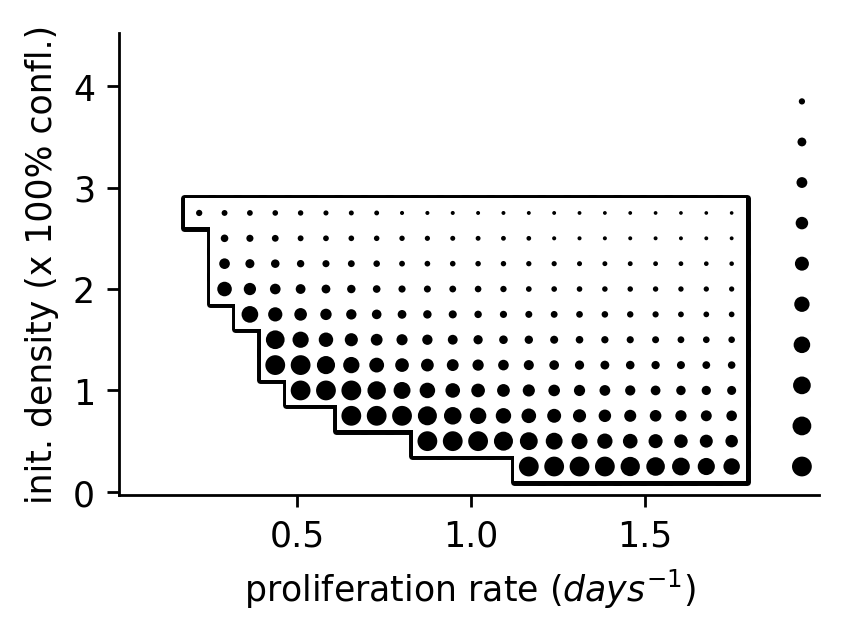

In [78]:
hv.output(stimulated_overlay2, dpi=250)

## Save

In [79]:
fname = "phasediagram_stimulated_area_v2"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(stimulated_overlay2, fpath, dpi=250)

__Make version just based on percent stimulation__

In [80]:
x_stretch = (2 - xlim[0]) / (xlim[1] - xlim[0])

stim_mask = np.logical_and((S_A_max_trunc / area_ceiling) > 0.025, (S_A_max_trunc / area_ceiling) < 0.975)

stimulated_plot3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    xlim = (xlim[0], 2),
    ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
    aspect = 25/18 * x_stretch,
    xlabel = r"proliferation rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5),
    marker = "s",
#     edgecolor = "w",
    s=70,
    c="w",
#     c=stimulated_pct[mask],
#     cmap=cmo.algae,
#     colorbar=True,
#     logx=True, 
    fontscale=1.,
)

stimulated_points_outline3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    marker = "s",
    edgecolor = "k",
    linewidth=2,
    s=70,
)

stimulated_var_points3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    marker=".",
    s=130 * (np.minimum(S_A_max, 2e5) / 2e5)[stim_mask],
    c="k",
)


stimulated_overlay3 = stimulated_points_outline3 * stimulated_plot3 * stimulated_var_points3 * var_points_scale

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
   .Scatter.IV  :Scatter   [x]   (y)
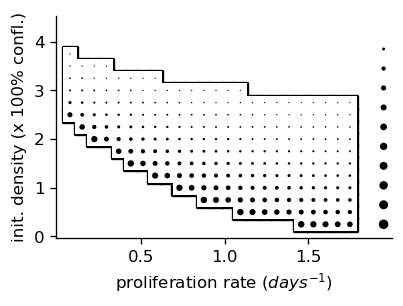

In [81]:
hv.output(stimulated_overlay3, dpi=120)

## Save

In [82]:
if save_figs:
    fname = "phasediagram_percent_stimulated_version3"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(stimulated_overlay3, fpath, dpi=250)


<hr>

## Add perturbed conditions to phase diagram

In [83]:
phasediagram_bare = phasediagram.options(dict(
    Points=dict(edgecolor=None, s=65)
)).opts(
    xaxis=None,
    yaxis=None,
)

:Overlay
   .Points.I :Points   [x,y]
   .HLine.I  :HLine   [x,y]
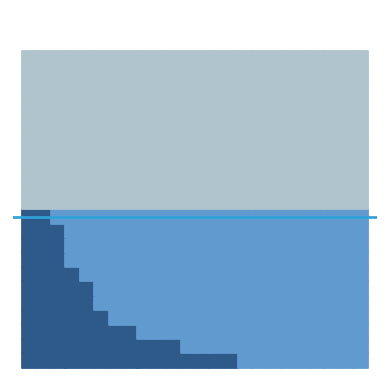

In [84]:
hv.output(phasediagram_bare * hv.HLine(2.75), dpi=130)

## Save

In [62]:
if save_figs:
    fname = "phasediagram_bare"
    
    fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))
    hv.save(phasediagram_bare, fpath, dpi=dpi)

In [57]:
dens_points = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
        (mle_params_df.g_inv_days.values[2], 2.),
        (mle_params_df.g_inv_days.values[2], 4.),
#         (mle_params_df.g_inv_days.values[0], 1.),
#         (mle_params_df.g_inv_days.values[1], 1.),
    ]
).opts(
    marker="^",
    c=[
        *lsig.yob[1:], 
#         lsig.purple, 
#         lsig.greens[3]
    ],
    s=250,
    ec=lsig.col_black,
)

dens_bare_overlay = phasediagram_bare * dens_points

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
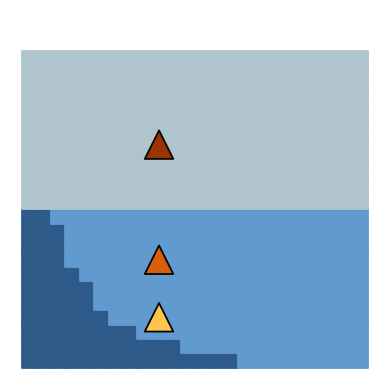

In [58]:
hv.output(dens_bare_overlay, dpi=130)

## Save

In [98]:
fname = "phasediagram_with_densities"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(dens_bare_overlay, fpath, dpi=dpi)

In [60]:
drug_points = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
#         (mle_params_df.g_inv_days.values[2], 2.),
#         (mle_params_df.g_inv_days.values[2], 4.),
        (mle_params_df.g_inv_days.values[0], 1.),
        (mle_params_df.g_inv_days.values[1], 1.),
    ]
).opts(
    marker="^",
    c=[
        lsig.yob[1],
        lsig.purple, 
        lsig.greens[3]
    ],
    s=250,
    ec=lsig.col_black,
)

drug_bare_overlay = phasediagram_bare * drug_points

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
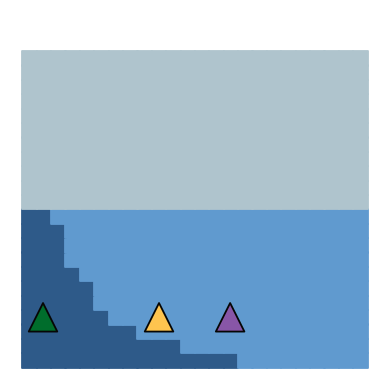

In [61]:
hv.output(drug_bare_overlay, dpi=130)

## Save

In [99]:
fname = "phasediagram_with_drugs"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(drug_bare_overlay, fpath, dpi=dpi)

In [63]:
dens_drug_points = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
        (mle_params_df.g_inv_days.values[2], 2.),
        (mle_params_df.g_inv_days.values[2], 4.),
        (mle_params_df.g_inv_days.values[0], 1.),
        (mle_params_df.g_inv_days.values[1], 1.),
    ]
).opts(
    marker="^",
    c=[*lsig.yob[1:], lsig.purple, lsig.greens[3]],
    s=250,
    ec=lsig.col_black,
)

dens_drug_bare_overlay = phasediagram_bare * dens_drug_points

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
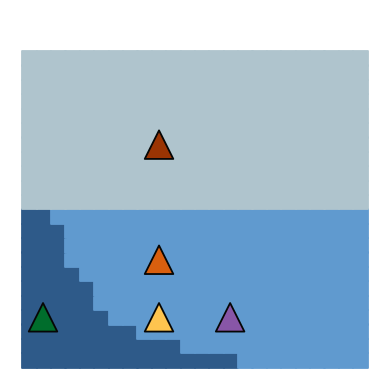

In [64]:
hv.output(dens_drug_bare_overlay, dpi=130)

## Save

In [100]:
fname = "phasediagram_with_densities_and_drugs"

fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fig_fmt))

if save_figs:
    hv.save(dens_drug_bare_overlay, fpath, dpi=dpi)

<hr>

### Functions to approximate critical values of phase boundary

In [8]:
@numba.njit
def t_crit_approx(g, rho_0, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [9]:
@numba.njit
def t_crit_approx_levelset(t_crit, g, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

In [10]:
@numba.njit
def t_crit_approx_nodilution(g, rho_0, rho_max, rho_crit):
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [11]:
@numba.njit
def t_crit_approx_levelset_nodilution(t_crit, g, rho_max, rho_crit):
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

<hr>

In [ ]:
tol = 1e-5

In [220]:
which_growing = (rho_max - param_space_agg[:, 1]) >= -tol

In [77]:
# Total area of well
# total_area = 3.2e7  # um^2 
total_area = 32     # mm^2 

# Approximate critical density in dimensionless units
rho_crit_approx_nodilution = 3.    # real units = dimensionless x 1250 mm^-2

In [78]:
max_act_num = S_actnum_mean.max(axis=1) 

max_act_prop = max_act_num / n 
max_act_area = max_act_prop * total_area 

In [79]:
mask = which_growing

area_data = {
    "g": param_space_agg[mask, 0], 
    "rho_0": param_space_agg[mask, 1],
    "area": max_act_area[mask],
}

plot = hv.Points(
    area_data,
    kdims=["g", "rho_0"],
    vdims=["area"],
).opts(
    title = r"$\rho$ₘₐₓ = " + "{0:.2f}".format(rho_max),
    xlim = ( 0, 2.5),
    ylim = ( 0, 6.0),
    xlabel = r"$g$",
    xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
    ylabel = r"$\rho_0$",
    yticks = (0, 2, 4, 6, 8),
#     marker = "s",
    s=35,
#         c=np.array(cc.glasbey_warm)[phase[mask]], 
    color="area",
    clabel=r"area $(mm^2)$",
    cmap="viridis",
    colorbar=True,
#     logx=True, 
    fontscale=1.5,
#         xaxis="top",
        hooks=[lsig.remove_RT_spines],
).redim.range(**{"area": (0, total_area)})


In [11]:
@numba.njit
def t_crit_approx_levelset_nodilution(t_crit, g, rho_max, rho_crit):
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

In [312]:
continuous_propagation = np.logical_and(starts_below_crit, ~reaches_max)

In [313]:
continuous_propagation.sum()

25

In [422]:
t_crits = np.array([0, 2, 4, 6]) / lsig.t_to_units(1)

In [374]:
gsize=100
g_min, g_max = g_space.min(), g_space.max()
g_range = np.linspace(g_min, g_max, gsize)

## Plot time of critical signaling collapse in the rho0-g plane
# Get the boundary in the rho0-g plane
rho0_tcls_0 = t_crit_approx_levelset_nodilution(
    0, g_range, rho_max, rho_crit_approx_nodilution
)

# Plot boundary 
tcls0 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_0))
).opts(
#     linestyle="dashed",
    linewidth=2,
    c=cc.glasbey_category10[1],
)

rho0_tcls_1 = t_crit_approx_levelset_nodilution(
    1, g_range, rho_max, rho_crit_approx_nodilution
)
tcls1 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_1))
).opts(
    linestyle="dashed",
    linewidth=2,
    c=cc.glasbey_warm[3]
)

rho0_tcls_2 = t_crit_approx_levelset_nodilution(
    2, g_range, rho_max, rho_crit_approx_nodilution
)
tcls2 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_2))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[5]
)

rho0_tcls_3 = t_crit_approx_levelset_nodilution(
    3, g_range, rho_max, rho_crit_approx_nodilution
)

tcls3 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_3))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[9]
)

rho0_tcls_5 = t_crit_approx_levelset_nodilution(
    5, g_range, rho_max, rho_crit_approx_nodilution
)

tcls5 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_5))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[10]
)

In [432]:
rho0_tcls_arr = [
    t_crit_approx_levelset_nodilution(
        i, g_range, rho_max, rho_crit_approx_nodilution
    ) for i in t_crits
]

tcls_data = {
    "t_crit": (np.repeat([f"{lsig.t_to_units(i):.1f}" for i in t_crits], gsize)),
    "g_range": np.tile(lsig.g_to_units(g_range), len(t_crits)),
    "rho_0": lsig.rho_to_units(np.concatenate(rho0_tcls_arr)),
}

# tcls_data = {
#     "t_crit": (np.repeat([f"{lsig.t_to_units(i):.2f}" for i in [0, 1, 2, 3, 5]], gsize)),
#     "g_range": np.tile(lsig.g_to_units(g_range), 5),
#     "rho_0": lsig.rho_to_units(np.concatenate([rho0_tcls_0, rho0_tcls_1, rho0_tcls_2, rho0_tcls_3, rho0_tcls_5])),
# }

tcls_overlay = hv.Curve(
    tcls_data,
    kdims=["g_range",],
    vdims=["rho_0", "t_crit"],
).groupby(
    "t_crit"
).opts(
    linestyle="dashed",
    linewidth=3,
    color="t_crit",
).overlay(
).opts(
    fontscale=1.5,
    show_legend=False, 
    legend_position="right",
#     legend_title=r"$t_{crit}$ (days)",
).options(
    {"Curve": dict(color=hv.Cycle(cc.glasbey_cool))}
)

In [433]:
mask = which_growing

area_data = {
    "proliferation rate": lsig.g_to_units(param_space_agg[mask, 0]), 
    "initial density": param_space_agg[mask, 1] * 1250,
    "area": max_act_area[mask],
}

cont_prop_points = hv.Points(
    (lsig.g_to_units(param_space_agg[continuous_propagation, 0]),
     lsig.rho_to_units(param_space_agg[continuous_propagation, 1]))
).opts(
    c="k",
    s=15,
    marker="^",
)

plot = hv.Points(
    area_data,
    kdims=["proliferation rate", "initial density"],
    vdims=["area"],
).opts(
#     title = r"$\rho$ₘₐₓ = {0:.0f} $cells/mm^2$".format(lsig.rho_to_units(rho_max)),
#     xlim = ( 0, 2.5),
#     ylim = ( 0, 6.0),
    xlabel = r"proliferation rate ($days^{-1}$)",
#     xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
    ylabel = r"initial density ($cells\,/\,mm^2$)",
#     yticks = (0, 2, 4, 6, 8),
#     marker = "s",
    s=35,
#         c=np.array(cc.glasbey_warm)[phase[mask]], 
    color="area",
    clabel=r"max. area $(mm^2)$",
    cmap="viridis",
    colorbar=True,
#     logx=True, 
    fontscale=1.5,
#         xaxis="top",
        hooks=[lsig.remove_RT_spines],
).redim.range(
    **{"area": (0, total_area)}
) 


:NdOverlay   [t_crit]
   :Curve   [g_range]   (rho_0,t_crit)
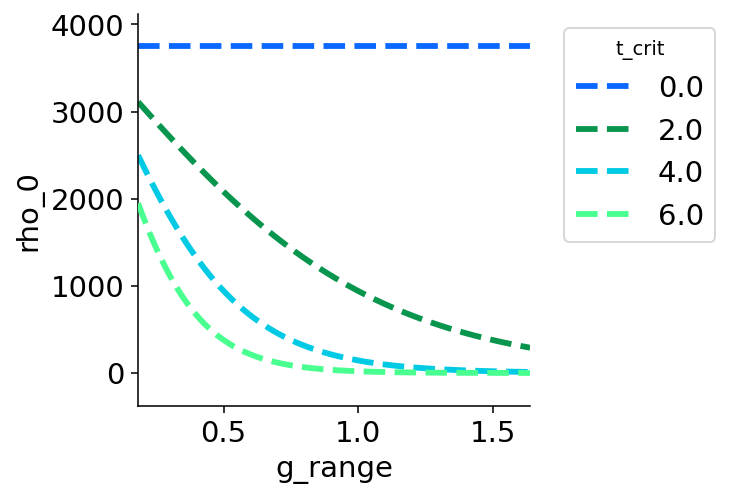

In [434]:
hv.output(tcls_overlay.opts(show_legend=True),dpi=140)

<hr>